#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model1 = Sequential()

W0705 17:25:06.212824 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
#卷積層1

In [9]:
model1.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0705 17:25:10.890514 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 17:25:10.901038 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model1.add(Dropout(rate=0.25))

W0705 17:25:16.486788 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0705 17:25:16.507925 140415865202560 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model1.add(MaxPooling2D(pool_size=(2, 2)))

W0705 17:25:22.008103 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
#卷積層2與池化層2

In [0]:
model1.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model1.add(Dropout(0.25))

In [0]:
model1.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model1.add(Flatten())
model1.add(Dropout(rate=0.25))

In [0]:
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))

In [0]:
model1.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [24]:
# (1) USE MSE
model1.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

W0705 17:26:07.891417 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [25]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

W0705 17:26:14.355600 140415865202560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 10s 261us/step - loss: 0.0699 - acc: 0.4327 - val_loss: 0.0614 - val_acc: 0.5471
Epoch 2/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0558 - acc: 0.5739 - val_loss: 0.0546 - val_acc: 0.6239
Epoch 3/12
37500/37500 [==============================] - 8s 208us/step - loss: 0.0502 - acc: 0.6254 - val_loss: 0.0517 - val_acc: 0.6493
Epoch 4/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.0459 - acc: 0.6629 - val_loss: 0.0468 - val_acc: 0.6677
Epoch 5/12
37500/37500 [==============================] - 8s 208us/step - loss: 0.0424 - acc: 0.6908 - val_loss: 0.0456 - val_acc: 0.6713
Epoch 6/12
37500/37500 [==============================] - 8s 209us/step - loss: 0.0391 - acc: 0.7186 - val_loss: 0.0423 - val_acc: 0.7030
Epoch 7/12
37500/37500 [==============================] - 8s 209us/step - loss: 0.0361 - acc: 0.7416 - val_loss: 0.0409 -

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

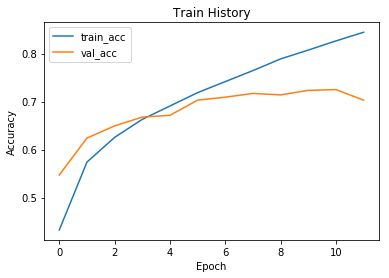

In [27]:
show_train_history('acc','val_acc')

In [28]:
# (2) USE binary_crossentropy
model2 = Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
print(model2.summary())
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

W0705 17:29:15.829283 140415865202560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         295168    
__________

In [29]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 282us/step - loss: 0.2476 - acc: 0.9078 - val_loss: 0.2032 - val_acc: 0.9190
Epoch 2/12
37500/37500 [==============================] - 9s 244us/step - loss: 0.1873 - acc: 0.9261 - val_loss: 0.1700 - val_acc: 0.9326
Epoch 3/12
37500/37500 [==============================] - 9s 245us/step - loss: 0.1531 - acc: 0.9396 - val_loss: 0.1524 - val_acc: 0.9397
Epoch 4/12
37500/37500 [==============================] - 9s 245us/step - loss: 0.1306 - acc: 0.9487 - val_loss: 0.1389 - val_acc: 0.9457
Epoch 5/12
37500/37500 [==============================] - 9s 245us/step - loss: 0.1115 - acc: 0.9567 - val_loss: 0.1375 - val_acc: 0.9463
Epoch 6/12
37500/37500 [==============================] - 9s 246us/step - loss: 0.0954 - acc: 0.9630 - val_loss: 0.1285 - val_acc: 0.9511
Epoch 7/12
37500/37500 [==============================] - 9s 246us/step - loss: 0.0814 - acc: 0.9685 - val_loss: 0.1347 -

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

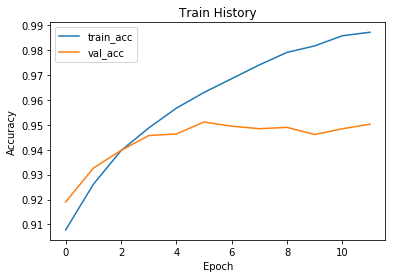

In [31]:
show_train_history('acc','val_acc')

In [32]:
# (3) USE MSE
model3 = Sequential()
model3.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))
print(model3.summary())
model3.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         295168    
__________

In [33]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model3.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 285us/step - loss: 0.0738 - acc: 0.3715 - val_loss: 0.0636 - val_acc: 0.4933
Epoch 2/12
37500/37500 [==============================] - 9s 251us/step - loss: 0.0570 - acc: 0.5619 - val_loss: 0.0527 - val_acc: 0.5969
Epoch 3/12
37500/37500 [==============================] - 9s 245us/step - loss: 0.0474 - acc: 0.6448 - val_loss: 0.0465 - val_acc: 0.6533
Epoch 4/12
37500/37500 [==============================] - 8s 205us/step - loss: 0.0409 - acc: 0.7013 - val_loss: 0.0456 - val_acc: 0.6651
Epoch 5/12
37500/37500 [==============================] - 7s 198us/step - loss: 0.0355 - acc: 0.7437 - val_loss: 0.0411 - val_acc: 0.6990
Epoch 6/12
37500/37500 [==============================] - 7s 198us/step - loss: 0.0313 - acc: 0.7765 - val_loss: 0.0405 - val_acc: 0.7059
Epoch 7/12
37500/37500 [==============================] - 7s 198us/step - loss: 0.0274 - acc: 0.8067 - val_loss: 0.0393 -

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

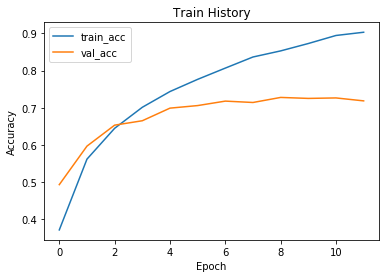

In [35]:
show_train_history('acc','val_acc')